# Customer Segmentation Project 
Customer Segmentation using clustering algorithms like K-means is powerful way to group people based on similar characterstics. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("C:/Users/HP/Desktop/Projects/Customer_Segmentation/Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Analyzing and PreProcessing Data

In [4]:
df.rename(columns={'Genre':'Gender','Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


As we can see that there is no null values or missing values in our dataset therefore we can proceed without pre-processing it.

In [5]:
# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'annual_income', 'spending_score']])

df.head(10)

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Exploratory Data Analysis(EDA)

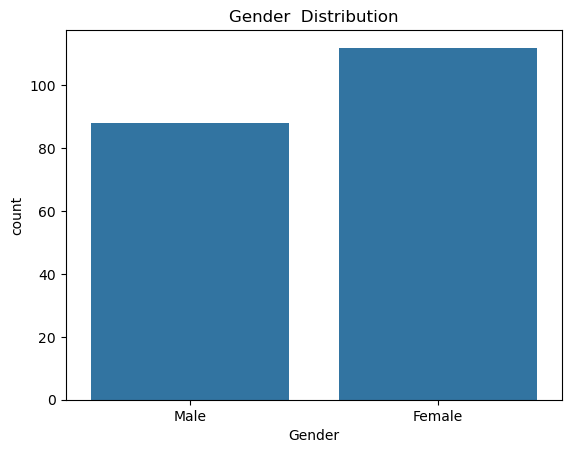

In [6]:
sns.countplot(x='Gender',data=df)
plt.title('Gender  Distribution')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15464\363574218.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='spending_score', data=df, palette='Set2')


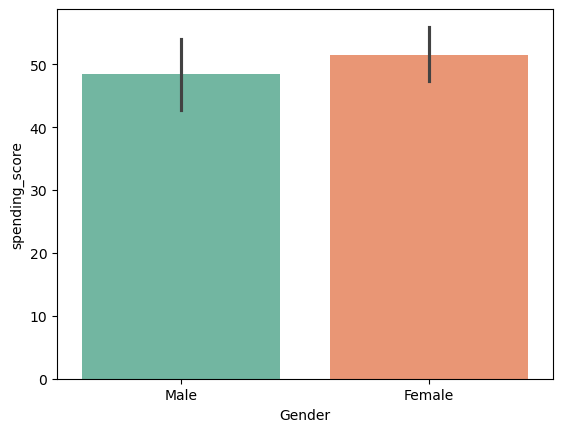

In [7]:
sns.barplot(x='Gender', y='spending_score', data=df, palette='Set2')
plt.show()

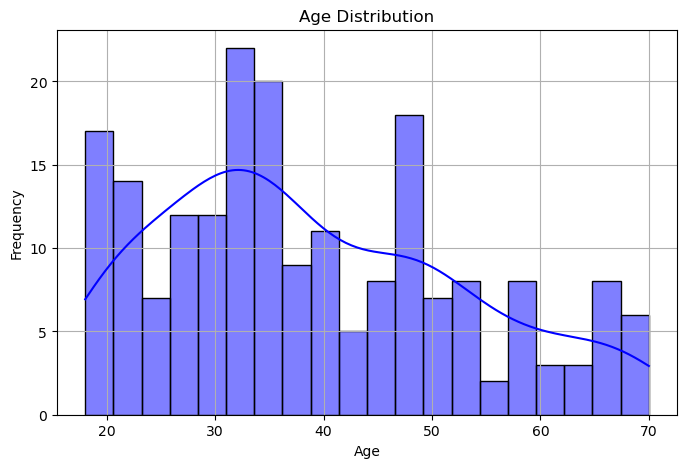

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
plt.show()
#To observe the Age distribution of customers 

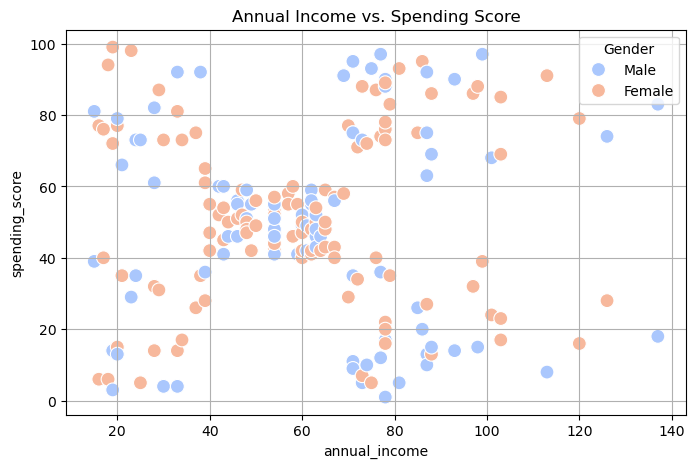

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='annual_income', y='spending_score', hue='Gender', data=df, palette='coolwarm', s=100)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.legend(title='Gender')
plt.grid()
plt.show()
#to observe the relationship between a customer's income and their spending score.

# Observations:
1. Gender Distribution: Maximum of our customers are female
2. Gender-Spending_score: Maximum spenders are female
3. Age Distribution: Maximum customer's lie between the age of 30-40
4. Annual_income-Spending_score: Maximum spenders or customers lie between whose annual-income is between 40-80

# Feature Engineering
Feature Engineering refers to create meaningful insights for segmentation 

In [13]:
selected_features = df[['Gender', 'Age', 'spending_score']]
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

scaler = StandardScaler()
selected_features[['Age', 'spending_score']] = scaler.fit_transform(selected_features[['Age', 'spending_score']])

clustering_matrix = selected_features.values
print("Processed Feature Matrix for Clustering:")
print(clustering_matrix[:5])


Processed Feature Matrix for Clustering:
[[ 1.         -1.42456879 -0.43480148]
 [ 1.         -1.28103541  1.19570407]
 [ 0.         -1.3528021  -1.71591298]
 [ 0.         -1.13750203  1.04041783]
 [ 0.         -0.56336851 -0.39597992]]


C:\Users\HP\AppData\Local\Temp\ipykernel_19064\3514546003.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[['Age', 'spending_score']] = scaler.fit_transform(selected_features[['Age', 'spending_score']])


In [14]:
inertia = []  # List to store inertia values
k_range = range(1, 11)  # Testing k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_matrix)
    inertia.append(kmeans.inertia_)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

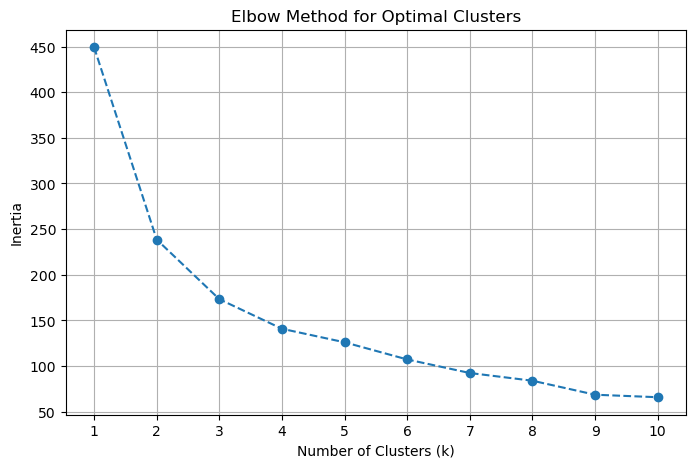

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()

In [17]:
optimal_k = 4  # Adjust based on the elbow method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_matrix)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


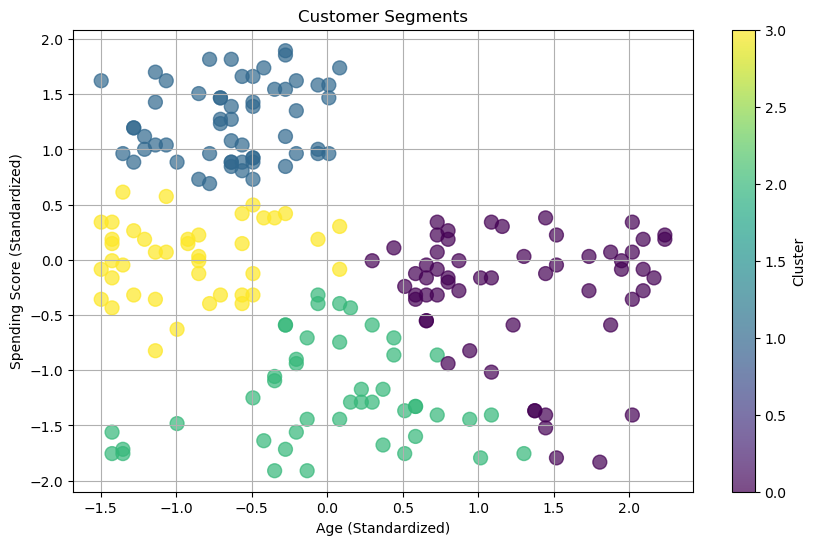

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(clustering_matrix[:, 1], clustering_matrix[:, 2], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Age (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

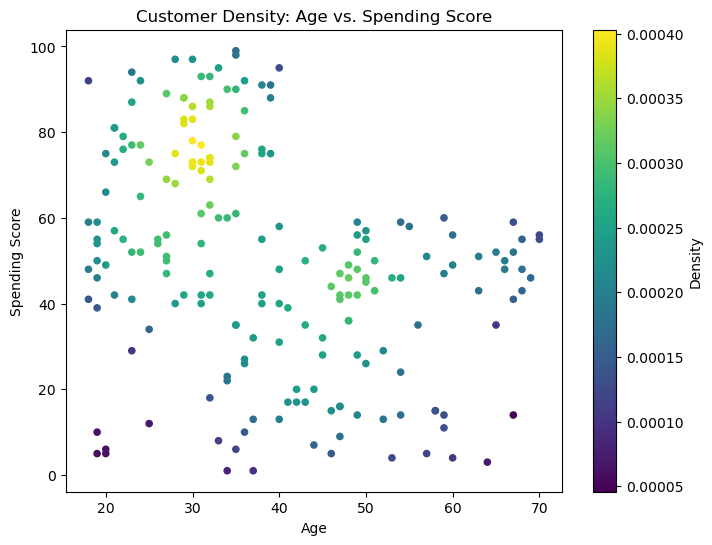

In [30]:
from scipy.stats import gaussian_kde
# Generate density plot data
x = df['Age']
y = df['spending_score']
xy = np.vstack([x, y])
z = gaussian_kde(xy)(xy)

# Heatmap
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=z, s=20, cmap='viridis')
plt.colorbar(scatter, label='Density')
plt.title('Customer Density: Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()


In [33]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'median'],
    'spending_score': ['mean', 'median'],
    'Gender': lambda x: x.value_counts(normalize=True).idxmax()  # Most common gender in each cluster
}).reset_index()

# Rename columns for better readability
cluster_summary.columns = ['Cluster', 'Age_Mean', 'Age_Median', 'SpendingScore_Mean', 'SpendingScore_Median', 'Most_Common_Gender']

# Display cluster summary
print("Cluster Characteristics:\n", cluster_summary)


Cluster Characteristics:
    Cluster   Age_Mean  Age_Median  SpendingScore_Mean  SpendingScore_Median  \
0        0  56.350877        55.0           42.719298                  46.0   
1        1  30.175439        30.0           82.350877                  81.0   
2        2  39.266667        40.0           18.488889                  16.0   
3        3  26.121951        26.0           50.707317                  52.0   

   Most_Common_Gender  
0                   1  
1                   0  
2                   0  
3                   0  


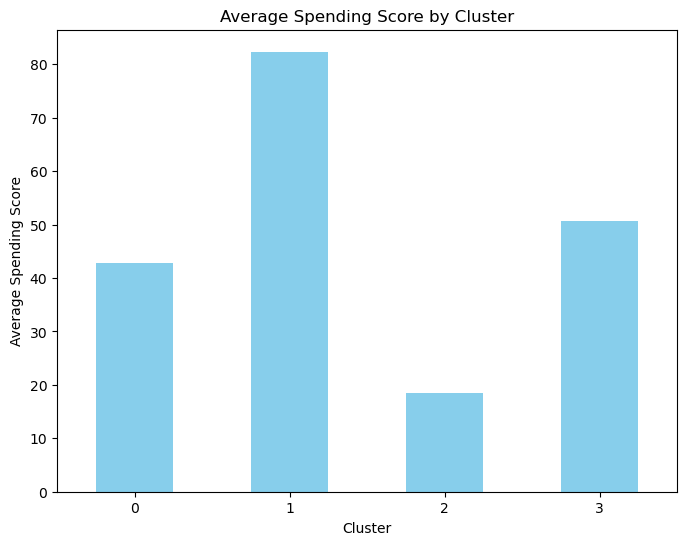

In [31]:
# Group data by cluster and calculate average spending score
cluster_avg = df.groupby('Cluster')['spending_score'].mean()

# Bar Plot
plt.figure(figsize=(8, 6))
cluster_avg.plot(kind='bar', color='skyblue')
plt.title('Average Spending Score by Cluster')
plt.ylabel('Average Spending Score')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.show()
